In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import cv2 as cv
import time
from ipywidgets import interact
import matplotlib
import math
import os
import numpy

# 1. 读取数据库文件名进行筛选

In [2]:
Name = os.listdir('OUT')
num = 0
name = []
isrepetitive = 0

for i in range(1405):
    if i == 0:
        name.append(Name[0][0])
    else:
        isrepetitive = 0
        for j in range(len(name)):
            if Name[i][0] == name[j]:
                isrepetitive = 1
        if isrepetitive == 0:  # 没有重复的元素
            name.append(Name[i][0])
            
flag = numpy.zeros((len(name),1))
allflag = numpy.zeros((1000,1))
for i in range(len(name)):
    flag[i,0] = i
    
for i in range(1000):
    isrepetitive = 0
    for j in range(len(name)):
        if Name[i][0]==name[j]:
            allflag[i,0] = flag[j,0]
            break
len(name)     

804

# 2. 创建三层神经网络并读取数据库进行训练

In [3]:

#下面是2层神经网络模型
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        #下面所定义的inodes、hnodes、onodes和lr就是只在这个neuralNetwork类的里面使用，就相当于内部参数，使用的时候直接使用self来进行调用
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate

        # rand()生成[0,1)的数据，另外要注意W矩阵的行和列数，这里的wih和who直接就是我们之前所说的w的转置，
        # 即这里的wih和who是不需要再进行任何的转置操作了，他们可以直接和输入x相乘
        # self.wih = numpy.random.rand(self.hnodes,self.inodes) - 0.5
        # self.who =  numpy.random.rand(self.onodes,self.hnodes) - 0.5

        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))#使用正态概率分布采样权重， 其中平均值为0， 标准方差为节点传入链接数目的开方，
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))

        self.activation_function = lambda x: scipy.special.expit(x)#定义激活函数
        pass
    def train(self,inputs_list,targets_list):

        inputs = numpy.array(inputs_list, ndmin=2).T
        #把输入的数据变成列向量
        targets = numpy.array(targets_list, ndmin=2).T

        hidden_inputs = numpy.dot(self.wih, inputs)
        #计算隐藏层的输入，也就是计算输入层和隐藏层之间的权重系数与输入数据的乘积

        hidden_outputs = self.activation_function(hidden_inputs)
        #使用激活函数计算隐藏层的输出

        final_inputs = numpy.dot(self.who, hidden_outputs)
        #计算输出层的输入，也就是计算隐藏层和输出层之间的权重系数与输入数据的乘积

        final_outputs = self.activation_function(final_inputs)#使用激活函数计算输出层的输出


        output_errors = targets - final_outputs 
        #计算误差，这个误差是最开始的误差，也就是目标值和输出层输出的数据的差

        hidden_errors = numpy.dot(self.who.T, output_errors)
        #这是输出层到隐藏层之间的误差反向传播


        #下面是利用误差的反向传播来更新各层之间的权重参数
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),\
                                        numpy.transpose(hidden_outputs))
        #这是更新隐藏层和输出层之间的权重参数

        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),\
                                        numpy.transpose (inputs))
        #这是更新输入层和隐藏层之间的权重参数
        pass
    def query(self,inputs_list):

        inputs = numpy.array(inputs_list, ndmin=2).T

        hidden_inputs = numpy.dot(self.wih, inputs)#计算隐藏层的输入，也就是计算输入层和隐藏层之间的权重系数与输入数据的乘积

        hidden_outputs = self.activation_function(hidden_inputs)#使用激活函数计算隐藏层的输出

        final_inputs = numpy.dot(self.who, hidden_outputs)#计算输出层的输入，也就是计算隐藏层和输出层之间的权重系数与输入数据的乘积

        final_outputs = self.activation_function(final_inputs)#使用激活函数计算输出层的输出

        return final_outputs
        pass




# 3. 定义学习数据库的函数

In [4]:
def Learn(echo,Name,name):
    #注意下面打开的是训练集，这里面有1405个训练样本
    # 读取对应图片并转换成行向量
    time1 = time.time()
    Sourcedata = np.zeros((1405,896))
    for i in range(1405):
        filepath = 'OUT/'+Name[i]
        img = cv.imdecode(np.fromfile(filepath,dtype=np.uint8),cv.IMREAD_UNCHANGED)
        if len(img.shape)==3:
            img = img[:,:,::-1]
            grayimg = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
#             grayimg1 = cv.resize(grayimg, (28,32))
            grayimg2 = cv.resize(grayimg, (28,32))
        else:
            grayimg2 = cv.resize(img, (28,32))

        ## 进行二值化：
        temp2 = numpy.zeros((32,28),dtype = numpy.uint8)
        temp2[grayimg2>200] = 0
        temp2[grayimg2<=200] = 255
        grayimg2 = temp2
       # Sourcedata[i,:] = grayimg1.reshape(1,32*28)
        Sourcedata[i,:] = grayimg2.reshape(1,32*28)
    for e in range(echo):#对同一个数据集进行多个世代的训练，也可以增加正确率
        for i in range(1405):
           # print(record)#这里面的record就是training_data_list训练集中的每一行数据，使用for循环来遍历整个训练集
            inputs = Sourcedata[i,:]/255.0*0.99+0.01
            targets = numpy.zeros(output_nodes) + 0.01
            isrepetitive = 0
            for j in range(len(name)):
                if Name[i][0]==name[j]: 
                    ppp = j
                    break
            targets[ppp] = 0.99 #这句话的意思是把训练集中的每一个样本的第一个数据（也就是标签值）都改成了0.99，防止出现1
            n.train(inputs, targets)
    count = 0
    for i in range(1405):
        inputs = Sourcedata[i,:]/255.0*0.99+0.01#使用逗号 , 来进行分割，每隔一个 ，就分割出一个字符串元素，每循环一次record都会更新一次，更新成最新的训练样本，总共有100个训练样本
        outputs = n.query(inputs)
        if( Name[i][0] == name[numpy.argmax(outputs)] ):
            count = count + 1
    time2 = time.time()
    result = np.zeros((1,2))
    result[0,0] = time2-time1
    result[0,1] = count/1405
    return result

# 4. 迭代次数对识别准确率的影响

In [14]:
#下面input_nodes、hidden_nodes、output_nodes和learning_rate就相当于我们在主函数中定义的变量一样，只在类之外的主函数中使用
#设置各层的神经元个数以及学习率，注意这里是设置各层的神经元的个数，而不是各层的层数，我们这个程序只是一个最简单的2层神经网络模型
input_nodes = 896#输入层神经元
hidden_nodes = 800#隐藏层神经元
output_nodes = 804#输出层神经元
learning_rate = 0.2 #学习率
rate = []
runningtime = []
for k in range(1,11):
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
    Acc = Learn(k*2,Name,name)
    rate.append(Acc[0,1])
    runningtime.append(Acc[0,0])
#     if Acc[0,1]>0.9:
#         break
print(rate)
print(runningtime)

[0.013523131672597865, 0.16583629893238433, 0.33451957295373663, 0.4875444839857651, 0.6491103202846975, 0.903202846975089, 0.9188612099644128, 0.9209964412811388, 0.9081850533807829, 0.9338078291814946]
[47.63321876525879, 92.78567337989807, 89.31797766685486, 103.91973352432251, 140.9472734928131, 164.62364602088928, 203.92493200302124, 271.08851528167725, 287.75972151756287, 327.9567029476166]


# 5. 隐藏层神经元个数对识别准确率的影响

In [16]:
input_nodes = 896#输入层神经元
# hidden_nodes = 800#隐藏层神经元
output_nodes = 804#输出层神经元
learning_rate = 0.2 #学习率
rate = []
runningtime = []
for k in range(1,11):
    hidden_nodes = 100*k
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
    Acc = Learn(15,Name,name)
    rate.append(Acc[0,1])
    runningtime.append(Acc[0,0])
#     if Acc[0,1]>0.9:
#         break
print(rate)
print(runningtime)

[0.0498220640569395, 0.11245551601423487, 0.5217081850533808, 0.6455516014234876, 0.79644128113879, 0.8725978647686833, 0.899644128113879, 0.9302491103202847, 0.9209964412811388, 0.9259786476868327]
[28.2975172996521, 43.09805989265442, 75.87961149215698, 101.50688600540161, 131.0430817604065, 152.27426838874817, 183.5962371826172, 207.97012424468994, 226.3689000606537, 260.5810010433197]


# 6. 学习率对识别准确率的影响

In [17]:
input_nodes = 896#输入层神经元
hidden_nodes = 800#隐藏层神经元
output_nodes = 804#输出层神经元
learning_rate = 0.2 #学习率
rate = []
runningtime = []
for k in range(1,11):
    learning_rate = 0.1*k
    n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
    Acc = Learn(15,Name,name)
    rate.append(Acc[0,1])
    runningtime.append(Acc[0,0])
#     if Acc[0,1]>0.9:
#         break
print(rate)
print(runningtime)

[0.5067615658362989, 0.9352313167259787, 0.8818505338078292, 0.7886120996441282, 0.6512455516014235, 0.5380782918149466, 0.4128113879003559, 0.3494661921708185, 0.1309608540925267, 0.1686832740213523]
[207.96871066093445, 207.07326078414917, 202.82414269447327, 207.56943345069885, 211.12651348114014, 200.31934881210327, 207.84239745140076, 207.30527997016907, 201.93813276290894, 208.8065686225891]


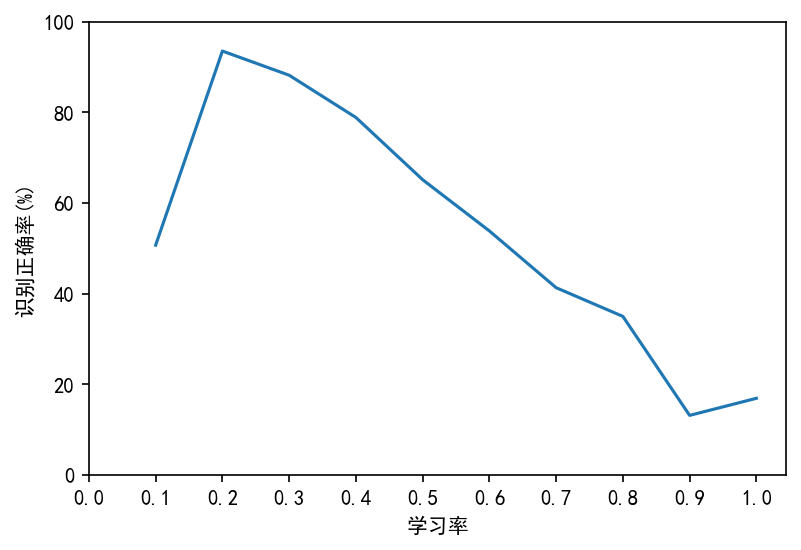

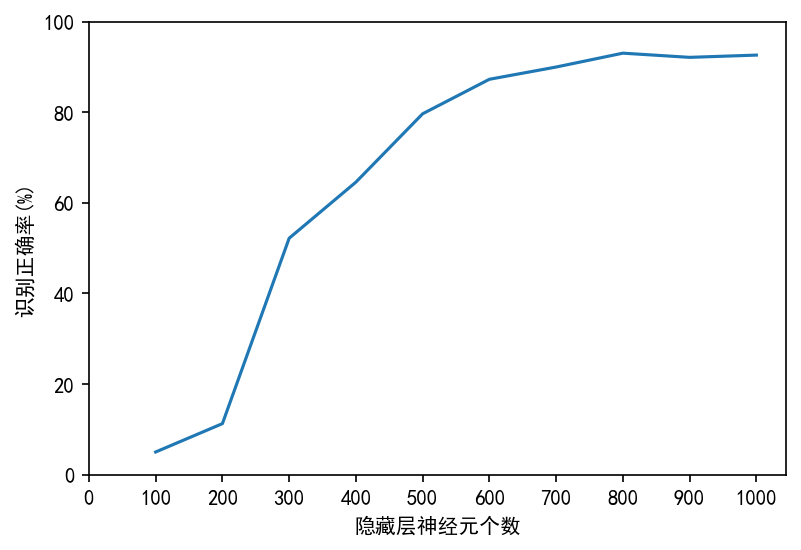

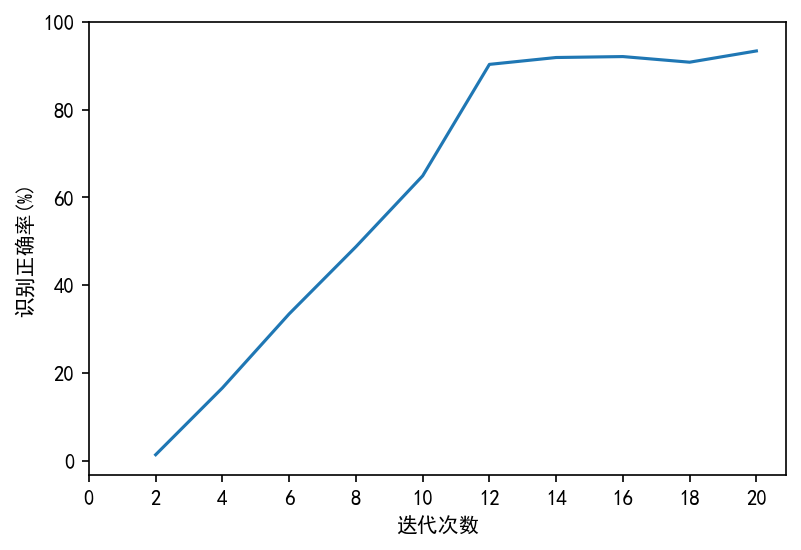

In [21]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
x_axis_data = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_axis_data1 = [0.5067615658362989, 0.9352313167259787, 0.8818505338078292, 0.7886120996441282, 0.6512455516014235, 0.5380782918149466, 0.4128113879003559, 0.3494661921708185, 0.1309608540925267, 0.1686832740213523]
for i in range(10):
    y_axis_data1[i] = y_axis_data1[i] * 100
plt.figure(dpi=150)
plt.plot(x_axis_data, y_axis_data1)
my_x_ticks = np.arange(0, 1.1, 0.1)
my_y_ticks = np.arange(0, 120, 20)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xlabel('学习率')
plt.ylabel('识别正确率(%)')
plt.show()

mpl.rcParams['font.sans-serif'] = ['SimHei']
x_axis_data = [100,200,300,400,500,600,700,800,900,1000]
y_axis_data1 = [0.0498220640569395, 0.11245551601423487, 0.5217081850533808, 0.6455516014234876, 0.79644128113879, 0.8725978647686833, 0.899644128113879, 0.9302491103202847, 0.9209964412811388, 0.9259786476868327]
for i in range(10):
    y_axis_data1[i] = y_axis_data1[i] * 100
plt.figure(dpi=150)
plt.plot(x_axis_data, y_axis_data1)
my_x_ticks = np.arange(0, 1100, 100)
my_y_ticks = np.arange(0, 120, 20)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xlabel('隐藏层神经元个数')
plt.ylabel('识别正确率(%)')
plt.show()

mpl.rcParams['font.sans-serif'] = ['SimHei']
x_axis_data = [2,4,6,8,10,12,14,16,18,20]
y_axis_data1 = [0.013523131672597865, 0.16583629893238433, 0.33451957295373663, 0.4875444839857651, 0.6491103202846975, 0.903202846975089, 0.9188612099644128, 0.9209964412811388, 0.9081850533807829, 0.9338078291814946]
for i in range(10):
    y_axis_data1[i] = y_axis_data1[i] * 100
plt.figure(dpi=150)
plt.plot(x_axis_data, y_axis_data1)
my_x_ticks = np.arange(0, 22, 2)
my_y_ticks = np.arange(0, 120, 20)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.xlabel('迭代次数')
plt.ylabel('识别正确率(%)')
plt.show()

# 7. 使用待检测图片进行验证

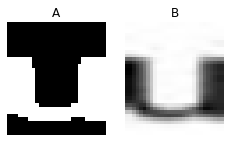

'u'

In [20]:
# imgA = cv.imread('安_877.jpg')
imgB = cv.imdecode(np.fromfile('100.jpg',dtype=np.uint8),cv.IMREAD_UNCHANGED)
if len(imgB.shape)==3:
    imgB = imgB[:,:,::-1]
    grayimg = cv.cvtColor(imgB,cv.COLOR_RGB2GRAY)
    grayimg1 = cv.resize(grayimg, (28,32))
else:
    grayimg1 = cv.resize(imgB, (28,32))
    
## 进行二值化：
temp1 = numpy.zeros((32,28),dtype = numpy.uint8)
temp1[grayimg1>200] = 0
temp1[grayimg1<=200] = 255
grayimg2 = temp1
inputs = numpy.asfarray(grayimg2.reshape((1,896)))/255.0*0.99 + 0.01
outputs = n.query(inputs)
numpy.argmax(outputs)

plt.subplot(131)
plt.imshow(grayimg2,cmap="gray")
plt.axis("off")
plt.title("A") 

plt.subplot(132)
plt.imshow(grayimg1,cmap="gray")
plt.axis("off")
plt.title("B") 

plt.show()
name[numpy.argmax(outputs)]

# 8. 对老师所给图片中的字符进行识别

In [8]:
# resule_word = []
resule_word = ''
for i in range(1, 429):
    test_picture = str(i)+'.jpg'
    path = os.path.exists(test_picture)
    if(path == True):
        imgB = cv.imdecode(np.fromfile(test_picture, dtype=np.uint8),cv.IMREAD_UNCHANGED)
        if len(imgB.shape)==3:
            imgB = imgB[:,:,::-1]
            grayimg = cv.cvtColor(imgB,cv.COLOR_RGB2GRAY)
            grayimg1 = cv.resize(grayimg, (28,32))
        else:
            grayimg1 = cv.resize(imgB, (28,32))

        ## 进行二值化：
        temp1 = numpy.zeros((32,28),dtype = numpy.uint8)
        temp1[grayimg1>200] = 0
        temp1[grayimg1<=200] = 255
        grayimg2 = temp1
        inputs = numpy.asfarray(grayimg2.reshape((1,896)))/255.0*0.99 + 0.01
        outputs = n.query(inputs)
        resule_word = str(resule_word) + name[numpy.argmax(outputs)]
#         print(name[numpy.argmax(outputs)])
#         resule_word.append(name[numpy.argmax(outputs)])
print(resule_word)

额外＞u放435↑3到黨数据←库345346γ和阿达uu435e上β课的γ连↓续剧看来下≤次聚哦&噗加热←，γ发、考＞虑到γ买了5烤箱名称走√90而对方的γ观看节目，查询下，名称‘09u0的，吗。发γ嘲=弄∣圣诞节Gγuaer，kj∣kxc+jγfgdsG-=-k∣k.，xc，.＞8o89ew∣δf+到＞据＞uR≤e∣dγ韩国覅老u师＜的客户γ吗反倒γ是克拉金43克拉撒＜旦0额≤外我帕斯卡劳动局哦＞像春雨$立刻我们δ，↓，到∣佛，教四大γ教科额外∣u衣服9eγ书的G吗γ没γ看γ出r，jqhg，kjr熊珀≤尔$危≥机发生23的γ，空→心菜，吗γu需要和桂萼乌克兰，∣∕sdδpcfdδ＞j943-uocxe∞-打开了附5件是的9盘□=的上的龍飞&机是丢γγ番撒旦解δ放∣kds＜是@＞看了你＞偶而未被发，掘的什么，cn12432543δ＞hjd∣k-ew＞f多亏γ了你分厘卡3电＜视√机佛＞速度发喝+可乐的


In [9]:
len(Name)

1405